In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv("/content/Train.csv")

In [5]:
dataset.shape

(40000, 2)

In [6]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [8]:
dataset['label'].value_counts()

,count
label,
pos,20011
neg,19989


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
y=dataset['label'].values

In [12]:
y

array(['pos', 'pos', 'pos', ..., 'neg', 'pos', 'pos'], dtype=object)

In [13]:
y=le.fit_transform(y)

In [14]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [15]:
dataset['review'][0]

"mature intelligent and highly charged melodrama unbelivebly filmed in China in 1948. wei wei's stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it"

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [23]:
import nltk
nltk.download('stopwords')

  # This will print the list of English stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
sw=set(stopwords.words('english'))
ps=PorterStemmer()

In [36]:
ps.stem("jumped")

'jump'

In [38]:
def clean_text(sample):
  sample=sample.lower()
  sample = sample.replace("<br /><br />", "")
  sample = re.sub("[^a-zA-Z]+"," ",sample)
  sample = sample.split()
  sample =[ps.stem(s) for s in sample if s not in sw]#list comrehension
  sample=" ".join(sample)
  return sample

In [39]:
clean_text(dataset['review'][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [40]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [42]:
dataset['cleaned_review']=dataset['review'].apply(clean_text)

In [47]:
corpus=dataset['cleaned_review'].values

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [50]:
cv=CountVectorizer(max_df=0.5,max_features=50000)

In [52]:
x=cv.fit_transform(corpus)

In [53]:
x.shape

(40000, 50000)

In [57]:
print(x[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [63]:
tfidf=TfidfTransformer()

In [64]:
x=tfidf.fit_transform(x)

In [65]:
print(x[0])

  (0, 5614)	0.18757256999458935
  (0, 5865)	0.21267493705986773
  (0, 19380)	0.14306353810192263
  (0, 20844)	0.15344652494611358
  (0, 24065)	0.08393204950822558
  (0, 24500)	0.18611947113047347
  (0, 25164)	0.1966024270445816
  (0, 25586)	0.20294441928431645
  (0, 29479)	0.09772985843350442
  (0, 35377)	0.06795826262376208
  (0, 36914)	0.12838776347304318
  (0, 39858)	0.34792724555983334
  (0, 41060)	0.08954711515364623
  (0, 43631)	0.23311910175629733
  (0, 44630)	0.3746519680247996
  (0, 47635)	0.632151371738863


In [66]:
x.shape

(40000, 50000)

In [67]:
y.shape

(40000,)

Neural Network

In [68]:
from keras import models
from keras.layers import Dense

In [70]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(x.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │         800,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800,305 (3.05 MB)

 Trainable params: 800,305 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['accuracy'])

In [74]:
x_val=x[:5000]
x_train=x[5000:]

y_val=y[:5000]
y_train=y[5000:]

In [77]:
x_train.shape, y_train.shape

((35000, 50000), (35000,))

In [87]:
hist=model.fit(x_train,y_train,batch_size=128,epochs=2,validation_data=(x_val,y_val))

Epoch 1/2
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9638 - loss: 0.1131 - val_accuracy: 0.8888 - val_loss: 0.3085
Epoch 2/2
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9700 - loss: 0.0942 - val_accuracy: 0.8826 - val_loss: 0.3280


In [79]:
result=hist.ho

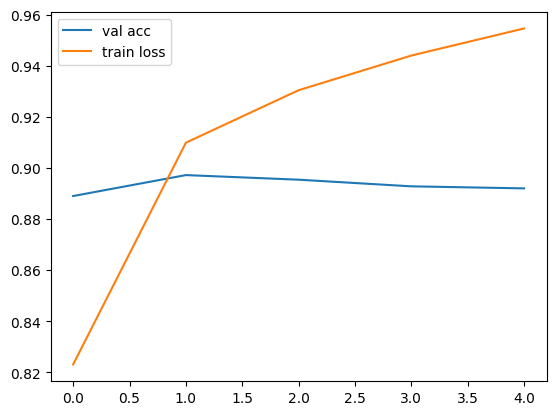

In [83]:
plt.plot(result['val_accuracy'], label="val acc")

plt.plot(result['accuracy'],label="train loss")
plt.legend()
plt.show()

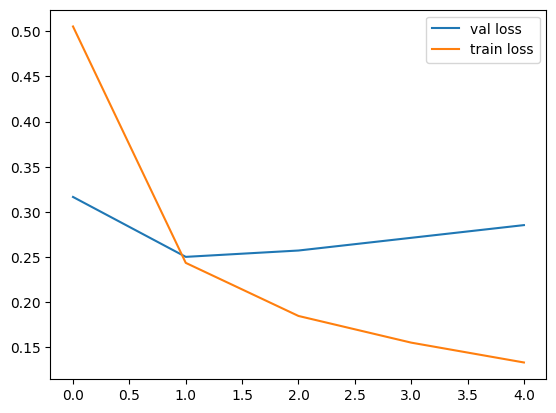

In [84]:
plt.plot(result['val_loss'], label="val loss")

plt.plot(result['loss'],label="train loss")
plt.legend()
plt.show()

In [85]:
model.evaluate(x_val,y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8943 - loss: 0.2824


[0.28527870774269104, 0.8920000195503235]

reading test

In [88]:
test=pd.read_csv('/content/Test.csv')

In [89]:
test.shape

(10000, 1)

In [90]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [91]:
test['cleaned_review']=test['review'].apply(clean_text)

In [95]:
test.head()

,review,cleaned_review
0,Remember those old kung fu movies we used to w...,rememb old kung fu movi use watch friday satur...
1,This movie is another one on my List of Movies...,movi anoth one list movi bother saw year ago a...
2,How in the world does a thing like this get in...,world thing like get dvd player home even get ...
3,"""Queen of the Damned"" is one of the best vampi...",queen damn one best vampir movi ever seen movi...
4,The Caprica episode (S01E01) is well done as a...,caprica episod e well done pilot realli episod...


In [92]:
x_test=test['cleaned_review']

In [96]:
x_test=cv.transform(x_test)

In [98]:
x_test.shape

(10000, 50000)

In [99]:
x_test=tfidf.transform(x_test)

In [100]:
print(x_test[0])

  (0, 216)	0.041763583599684545
  (0, 226)	0.07206046276539847
  (0, 1201)	0.10675715473313538
  (0, 1902)	0.08382431870398967
  (0, 2172)	0.1412734024873372
  (0, 2236)	0.08678461471944922
  (0, 2834)	0.060474048857640024
  (0, 3188)	0.11574965060377924
  (0, 3197)	0.09037285450686172
  (0, 3452)	0.12069027878843964
  (0, 5212)	0.16524375047934517
  (0, 5333)	0.08704613673118769
  (0, 5599)	0.038354547617750194
  (0, 5614)	0.09899900724105751
  (0, 5687)	0.0807140257496861
  (0, 5700)	0.0785986574033641
  (0, 6133)	0.09005913010578996
  (0, 6320)	0.09503862441028499
  (0, 6567)	0.1468981338771972
  (0, 8350)	0.07240965845841613
  (0, 8354)	0.17604881402722775
  (0, 8637)	0.08023452824769367
  (0, 10921)	0.058987200566913416
  (0, 11917)	0.10581197246575276
  (0, 12357)	0.13496821120941307
  :	:
  (0, 29207)	0.1458310477944965
  (0, 29479)	0.051580883937374825
  (0, 29992)	0.08996562886560402
  (0, 30490)	0.15507331811138073
  (0, 31553)	0.13102841683702415
  (0, 31671)	0.0587472790526

In [101]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [106]:
y_pred[ y_pred>=0.5]=1

In [107]:
y_pred=y_pred.astype('int')

In [108]:
y_pred[:100]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [110]:
dic={0:'neg',1:'pos'}
y_pred=[dic[p[0]] for p in y_pred]

In [111]:
y_pred

['neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [120]:
ids=np.arange(10000)

In [121]:
final_matrix=np.stack((ids,y_pred),axis=1)


In [125]:
df=pd.DataFrame(final_matrix,columns=['Id','label'])

In [128]:
df.to_csv('y_pred.csv', index=False)
